# Clustering Jerárquico

Seguimos avanzando con los algoritmos de **Aprendizaje No Supervisado**, y el último que veremos se llama **Clustering Jerárquico**, y es un método de análisis de clusters (o agrupamientos) que busca construir una jerarquía entre esos clusters.

A diferencia de otros métodos de clustering como **k-means**, en el que hacíamos agrupamientos con los *centroides*, pero donde debíamos especificar el número de clusters de antemano, el **clustering jerárquico** no requiere que hagamos esa especificación, y proporciona una herramienta visual llamada **dendrograma** para ayudar a determinar el número óptimo de clusters en nuestros datos.

Hay **dos enfoques** principales en el clustering jerárquico:
+ **Aglomerativo (Bottom-up)**: Comienza tratando cada punto de datos como un cluster individual y luego va iterando entre los clusters y fusionando los más cercanos, hasta que todos los puntos se han fusionado en un único cluster que contiene todos los datos.
+ **Divisivo (Top-down)**: Comienza con un único cluster que contiene todos los puntos de datos y luego recorre el cluster de manera iterativa, dividiéndolo en clusters más pequeños, hasta que cada punto se encuentra en su propio cluster.
	
La elección entre estos enfoques depende de los datos específicos y de las preferencias del usuario.

Ahora mismo vamos a poner en práctica la implementación de Clustering Jerárquico en Python usando el primero de esos modos que es el **aglomerativo**. Creo que lo que más te va a gustar de este algoritmo es la facilidad con que lo vamos a implementar.

Vamos a importar nuestras bibliotecas, incluido el dataset de `iris` para poder usarlo como ejemplo.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
iris = load_iris()

Y generamos la variable `X`.

In [3]:
X = iris.data

Vamos a guardar el **clustering** en una variable:

In [4]:
linked = linkage(X, 'ward')

El método de `ward` es una opción muy popular para el clustering jerárquico aglomerativo, porque se enfoca en minimizar la varianza dentro de cada cluster en cada paso de la fusión. De esta manera, se intenta asegurar de que los clusters sean lo más compactos y homogéneos posible. 

Además del método de `ward`, hay otras opciones disponibles para este parámetro en la función `linkage()`, que se pueden utilizar dependiendo de las características de tus datos y de lo que estés tratando de lograr con tu análisis de clustering.

A continuación te comparto una lista con las otras opciones por si quieres conocerlas y probarlas por tu cuenta:
+ `'single'`: También conocido como el método del vecino más cercano. Este enfoque fusiona los dos clusters que tienen la distancia mínima más pequeña entre sus puntos más cercanos. Es sensible a los valores atípicos y puede producir clusters "largos y finos".
+ `'complete'`: También conocido como el método del vecino más lejano. Fusiona los clusters con la menor distancia máxima entre sus puntos. Tiende a producir clusters más compactos que el método `'single'`, pero aún puede ser sensible a los valores atípicos.
+ `'average'`: Este método fusiona los clusters basándose en la distancia media entre todos los pares de puntos en los dos clusters. Ofrece un equilibrio entre los métodos `'single'` y `'complete'`, y a menudo produce resultados razonables sin ser demasiado sensible a los valores atípicos.
+ `'centroid'`: Fusiona los dos clusters que tienen la menor distancia entre sus centroides. Esto puede ser menos sensible a los valores atípicos que `'single'` o `'complete'`, pero puede sufrir del problema de inversión, donde los clusters más pequeños pueden fusionarse más tarde en el proceso de lo que uno esperaría.

Y ahora sí, aunque no lo creas y así de fácil, ya estamos en condiciones de mostrar lo que ha hecho nuestro modelo.

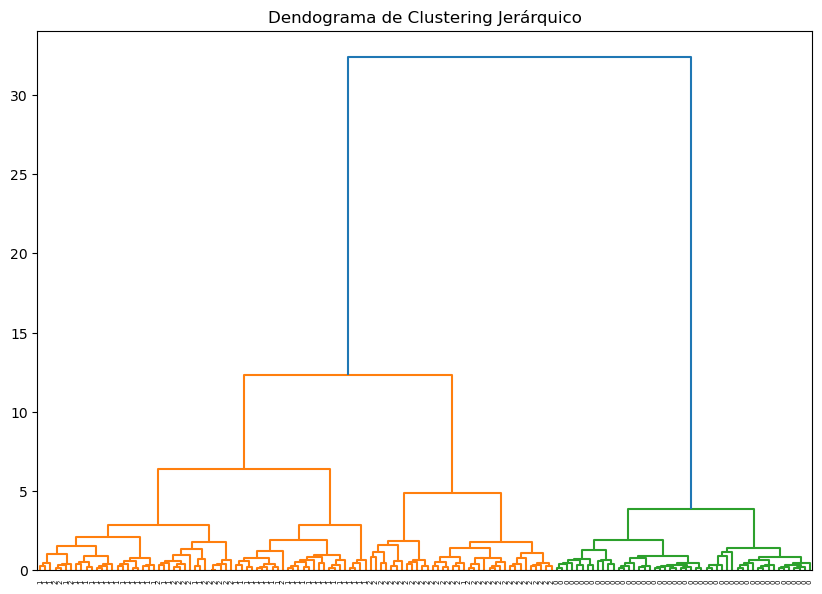

In [5]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
         orientation='top',
         labels=iris.target,
         distance_sort='descending',
         show_leaf_counts=True)
plt.title("Dendograma de Clustering Jerárquico");

Ahora que estás viendo el gráfico, te voy a explicar específicamente qué hace cada parámetro:
+ `linked`: Este es el primer y principal argumento, que le proporciona los datos de enlace generados por la función `linkage()`. Es el que contiene información sobre las distancias (o las similitudes) que hay entre los clusters en cada etapa del proceso de clustering jerárquico y cómo los clusters se combinan en cada paso.
+ `orientation='top'`: Este parámetro especifica la orientación del dendrograma. De esta manera se dibuja con las raíces en la parte superior y las hojas se extienden hacia abajo. Esto significa que el árbol crece hacia abajo desde la parte superior de la figura.
+ `labels=iris.target`: Aquí, `labels` asigna etiquetas a las hojas del dendrograma. 
+ `distance_sort='descending'`: Este parámetro controla cómo se ordenan las ramas en el dendrograma. Con `'descending'`, las ramas que se fusionaron más tarde, se colocan más cerca de la parte superior del dendrograma. Esto puede ayudar a identificar los principales grupos o divisiones dentro de los datos.
+ `show_leaf_counts=True`: Cuando se establece en `True`, este parámetro añade números entre paréntesis al final de las etiquetas de las hojas para indicar el número de puntos de datos originales contenidos en ese cluster. Esto es particularmente útil para entender el tamaño de los clusters sin necesidad de contar manualmente las hojas del dendrograma.

En definitiva, con este bloque de este código, `linkage()` ha realizado el **clustering jerárquico aglomerativo** en los datos de `X`, usando el método `ward`, que minimiza la varianza de los clusters que se van fusionando. Luego, con `dendrogram` hemos creado un dendrograma que nos ha proporcionado una representación visual de cómo se combinan los clusters a diferentes niveles de similitud.

Este dendrograma nos ayuda a visualizar las decisiones tomadas por el algoritmo en cada paso del proceso de fusión y puede usarse para determinar un número adecuado de clusters cortando el dendrograma en una altura específica.

Entonces el **clustering jerárquico** es una técnica poderosa y muy versátil para el análisis de clusters que no solo agrupa los datos sino que también proporciona información sobre su estructura jerárquica. Es especialmente útil cuando la relación entre los puntos de datos es importante o cuando se desea explorar diferentes niveles de granularidad en el agrupamiento de los datos. 

Y a lo largo del día de hoy has conocido los **5 algoritmos** de **Aprendizaje No Supervisado** más importantes, por lo que creo que ha llegado el momento de poner todo esto en acción a través de un interesante proyecto que no te querrás perder, y que comienza en la próxima lección.